# Get data from DB

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
    host="sv-procon.uet.vnu.edu.vn",
    user="root",
    passwd="iotlab2018",
    database="irrigation_database"
)
print(mydb)
mycursor = mydb.cursor()
mycursor.execute("select * from Sensing")
myresult = mycursor.fetchall()

In [2]:
import pandas as pd
columns=['SensingID','DeviceID','PlotID','SoilMoisture','Humidity','Temperature','LightLevel','TimeOfMeasurement']
data = pd.DataFrame(myresult,columns=columns)
data

,SensingID,DeviceID,PlotID,SoilMoisture,Humidity,Temperature,LightLevel,TimeOfMeasurement
0,1,81604378625,1,47.4427,94.2,26.0,0,2020-04-20 01:18:41
1,2,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:19:01
2,3,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:19:21
3,4,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:19:41
4,5,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:20:01
...,...,...,...,...,...,...,...,...
41249,41405,68719476737,1,42.2956,77.3,31.9,0,2020-06-12 09:43:57
41250,41406,68719476737,1,42.5633,77.4,32.0,0,2020-06-12 09:44:17
41251,41407,68719476737,1,42.5633,77.3,31.9,0,2020-06-12 09:44:38
41252,41408,68719476737,1,42.5633,77.4,32.0,0,2020-06-12 09:45:18


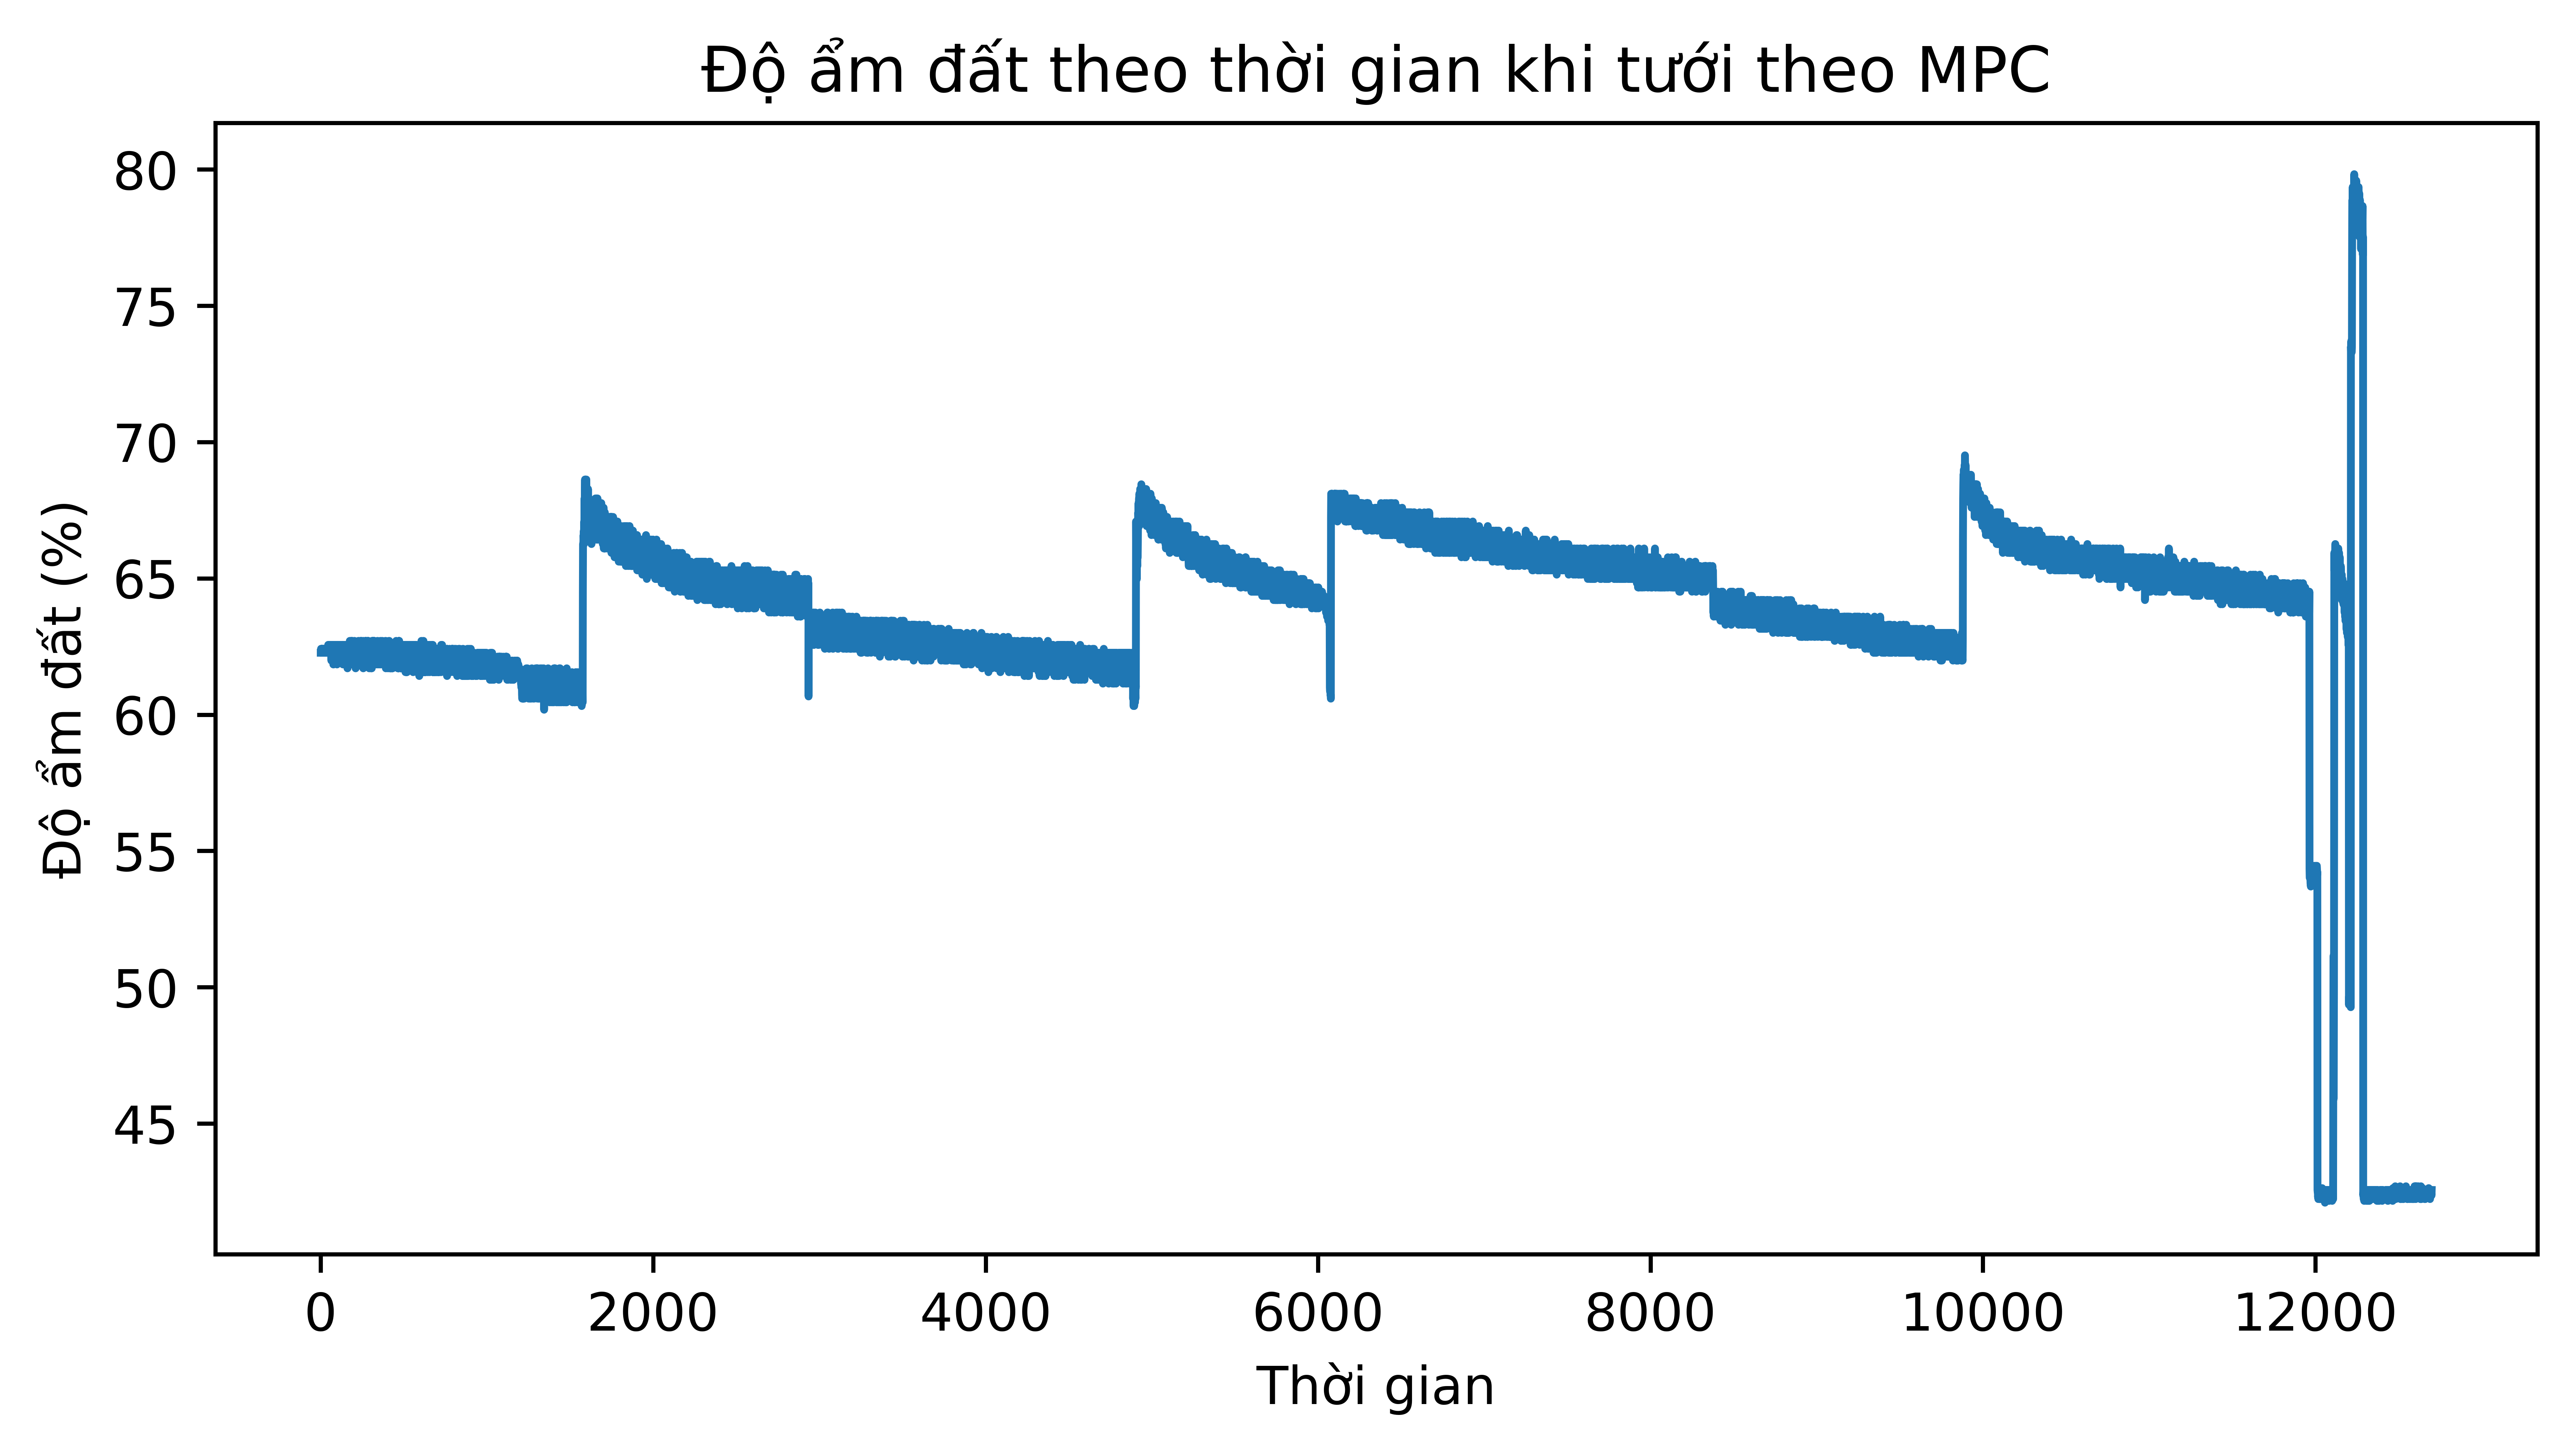

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 4), dpi=1000, facecolor='w', edgecolor='k')
plt.title("Độ ẩm đất theo thời gian khi tưới theo MPC")
plt.xlabel("Thời gian")
plt.ylabel("Độ ẩm đất (%)")
plt.plot([data.SoilMoisture[i+28500] for i in range(len(data.SoilMoisture[28500:])-50) if i!=(31440-28500)and i!=(29709-28500) and i!=(29710-28500)]) 
# plt.plot(data.SoilMoisture[29706:29720])
plt.savefig("real_watering.svg")

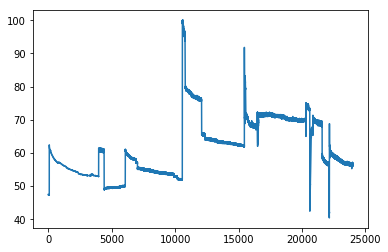

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(data.SoilMoisture[:24000])
# plt.plot(data.Temperature[10580:12000])
# plt.plot(data.Temperature)
# plt.plot(data.Humidity)
data_eva=[]
data_eva.append(data[80:3965])
data_eva.append(data[6070:10565])
data_eva.append(data[10580:10780])
data_eva.append(data[12500:15460])
data_eva.append(data[15580:16450])
data_eva.append(data[16580:20310])
data_eva.append(data[20320:24000])


In [10]:
len(data_eva)

7

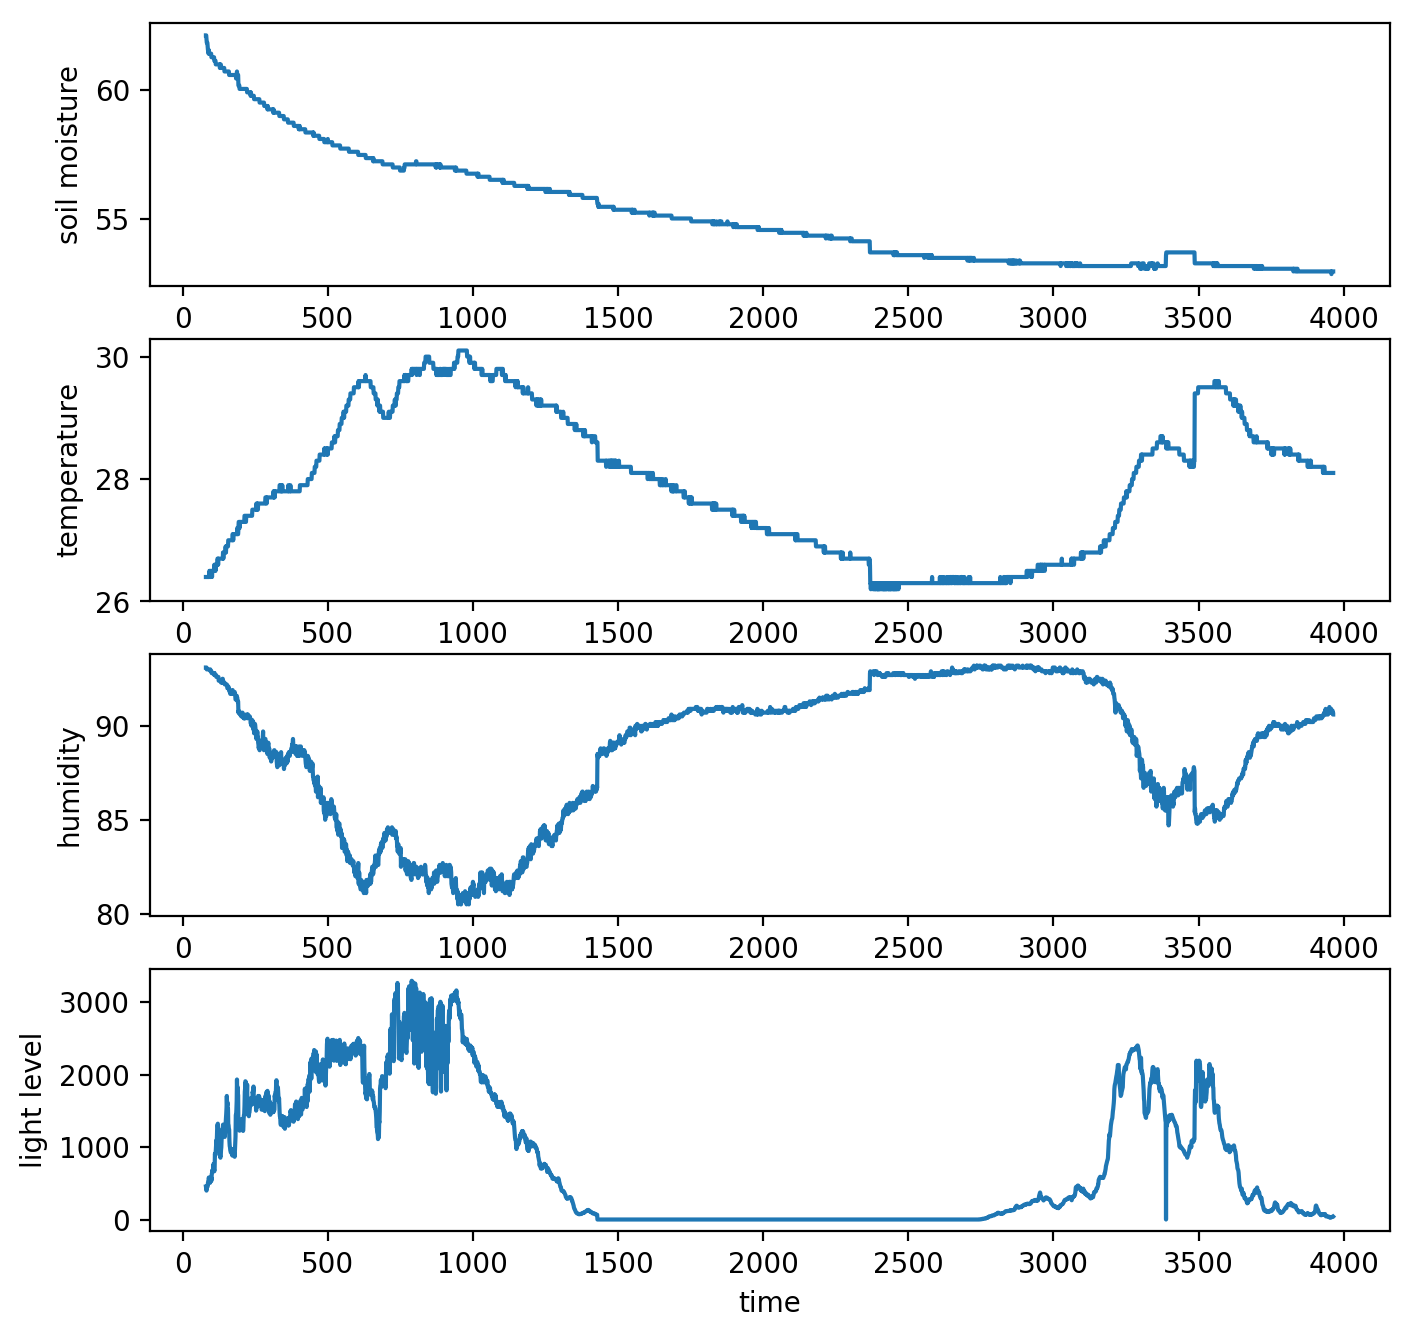

In [6]:
# figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
fig,axs = plt.subplots(4,1,figsize=(8,8), dpi=200)
# for i in range(len(data_eva)):
#     axs[i//2,i%2].plot(data_eva[i].SoilMoisture)
axs[0].plot(data_eva[0].SoilMoisture)
axs[1].plot(data_eva[0].Temperature)
axs[2].plot(data_eva[0].Humidity)
axs[3].plot(data_eva[0].LightLevel)

axs[0].set_xlabel('time')
axs[1].set_xlabel('time')
axs[2].set_xlabel('time')
axs[3].set_xlabel('time')

axs[0].set_ylabel('soil moisture')
axs[1].set_ylabel('temperature')
axs[2].set_ylabel('humidity')
axs[3].set_ylabel('light level')

plt.show()

In [7]:
from scipy.signal import savgol_filter

for i in range(len(data_eva)):
    data_eva[i].SoilMoisture = savgol_filter(data_eva[i].SoilMoisture, 101, 1)
    data_eva[i].Humidity = savgol_filter(data_eva[i].Humidity, 101, 1)
    data_eva[i].Temperature = savgol_filter(data_eva[i].Temperature, 101, 1)
    data_eva[i].LightLevel = savgol_filter(data_eva[i].LightLevel, 101, 1)

/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/pandas/core/generic.py:5302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


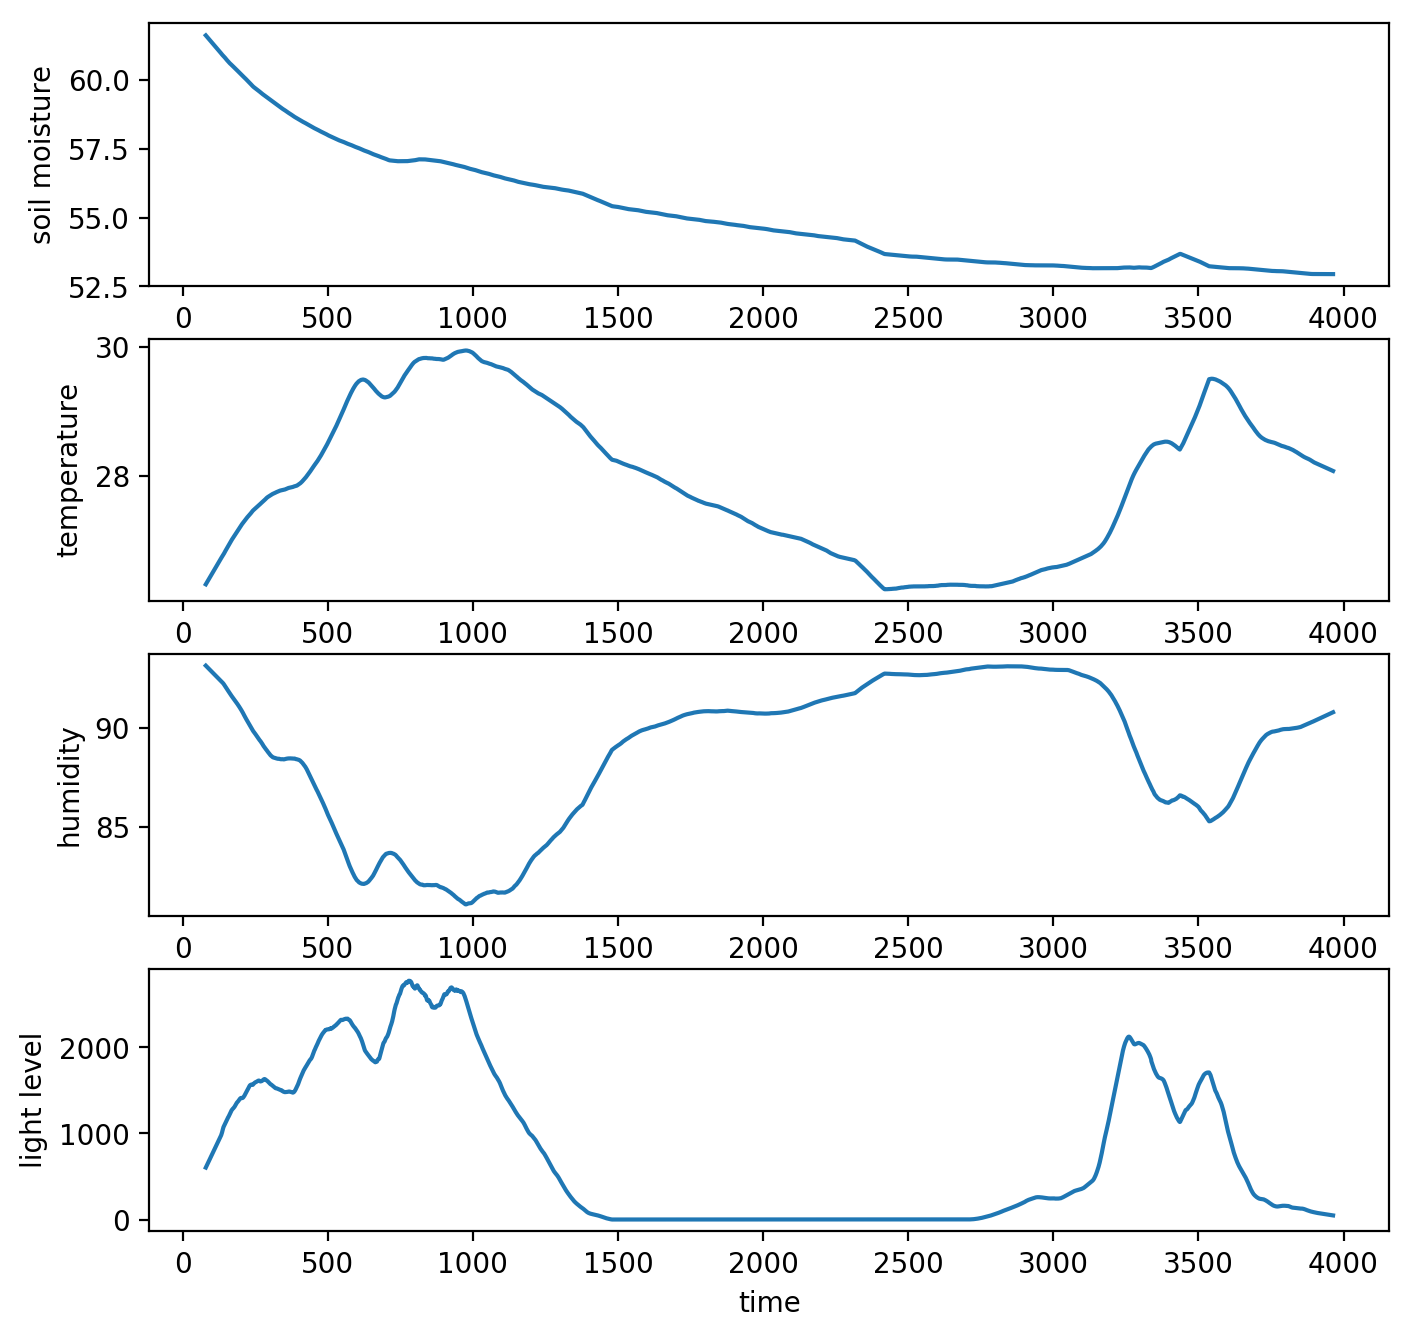

In [8]:
fig,axs = plt.subplots(4,1,figsize=(8,8), dpi=200)
# for i in range(len(data_eva)):
#     axs[i//2,i%2].plot(data_eva[i].SoilMoisture)
axs[0].plot(data_eva[0].SoilMoisture)
axs[1].plot(data_eva[0].Temperature)
axs[2].plot(data_eva[0].Humidity)
axs[3].plot(data_eva[0].LightLevel)

axs[0].set_xlabel('time')
axs[1].set_xlabel('time')
axs[2].set_xlabel('time')
axs[3].set_xlabel('time')

axs[0].set_ylabel('soil moisture')
axs[1].set_ylabel('temperature')
axs[2].set_ylabel('humidity')
axs[3].set_ylabel('light level')

plt.show()

# Pre-processing

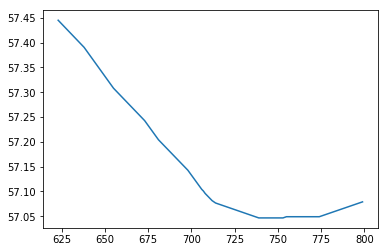

In [9]:
plt.plot(data_eva[0].SoilMoisture[181*3:(180*4)])

In [10]:
for i in range(len(data_eva)):
    for j in data_eva[i].index:
        if(data_eva[i].SoilMoisture[j] > 100):
            data_eva[i].SoilMoisture[j] = 100
    print(max(data_eva[i].SoilMoisture))

61.613552708212005
60.85144525334888
100.0


/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


64.17966348281887
71.65520745486315
71.62351089108908
74.28038444962142


In [11]:
data_eva

[      SensingID     DeviceID  PlotID  SoilMoisture   Humidity  Temperature  \
 80           81  81604378625       1     61.613553  93.152592    26.332324   
 81           82  81604378625       1     61.601310  93.137817    26.340014   
 82           83  81604378625       1     61.589068  93.123043    26.347704   
 83           84  81604378625       1     61.576826  93.108268    26.355394   
 84           85  81604378625       1     61.564583  93.093493    26.363084   
 ...         ...          ...     ...           ...        ...          ...   
 3960       3961  81604378625       1     52.949315  90.772459    28.090229   
 3961       3962  81604378625       1     52.949262  90.779286    28.088188   
 3962       3963  81604378625       1     52.949208  90.786113    28.086146   
 3963       3964  81604378625       1     52.949155  90.792940    28.084104   
 3964       3965  81604378625       1     52.949102  90.799767    28.082062   
 
       LightLevel   TimeOfMeasurement  
 80    603

In [12]:
interval = 3600 #second
start_index=int(interval/20)
for index in range(len(data_eva)):
    nextSoilMoisture = [None for i in range(len(data_eva[index]))]
    nextSoilMoisture=pd.Series(nextSoilMoisture)
    for i in data_eva[index].index:
        if (i<data_eva[index].index.stop-start_index):
           nextSoilMoisture[i]=data_eva[index].SoilMoisture[i+start_index]
    data_eva[index]['nextSoilMoisture']=nextSoilMoisture

/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.reset_option("display")
data_use=pd.concat(data_eva,ignore_index=True)
# (data_eva[1])
data_use

,SensingID,DeviceID,PlotID,SoilMoisture,Humidity,Temperature,LightLevel,TimeOfMeasurement,nextSoilMoisture
0,81,81604378625,1,61.613553,93.152592,26.332324,603.810716,2020-04-20 08:35:23,59.6189
1,82,81604378625,1,61.601310,93.137817,26.340014,610.871730,2020-04-20 08:35:43,59.611
2,83,81604378625,1,61.589068,93.123043,26.347704,617.932743,2020-04-20 08:36:03,59.6019
3,84,81604378625,1,61.576826,93.108268,26.355394,624.993757,2020-04-20 08:37:03,59.594
4,85,81604378625,1,61.564583,93.093493,26.363084,632.054770,2020-04-20 08:37:23,59.5849
...,...,...,...,...,...,...,...,...,...
19815,24099,68719476737,1,56.516889,91.031201,28.052061,0.000000,2020-05-24 02:06:05,NaN
19816,24100,68719476737,1,56.520019,91.047032,28.046369,0.000000,2020-05-24 02:06:25,NaN
19817,24101,68719476737,1,56.523149,91.062863,28.040678,0.000000,2020-05-24 02:06:46,NaN
19818,24102,68719476737,1,56.526279,91.078694,28.034987,0.000000,2020-05-24 02:07:27,NaN


In [14]:
data_use = data_use[['SoilMoisture','Humidity','Temperature','nextSoilMoisture']]
# data_use.to_csv('data_use.csv')

In [15]:
import math
remove_rows=[i for i in range(len(data_use)) if data_use.nextSoilMoisture[i] is None or math.isnan(data_use.nextSoilMoisture[i])]
len(remove_rows)

1260

In [16]:
data_use = data_use.drop(remove_rows,axis=0)

In [17]:
data_use = (data_use.reset_index()).drop(['index'],axis=1)
# data_use.nextSoilMoisture = data_use.nextSoilMoisture*(-1)

In [18]:
data_use.nextSoilMoisture = data_use.nextSoilMoisture.astype(float)

In [19]:
data_use.corr()
data_use.to_csv("data_use.csv")

### Scale train dataset

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [21]:
def scaleData(min_value, max_value, min_range, max_range, value):
    return min_range+((value-min_value)*(max_range-min_range))/(max_value-min_value)
def scaleDatas(min_value, max_value, min_range, max_range, values):
    values_ret=[]
    for i in range(len(values)):
        values_ret.append(scaleData(min_value, max_value, min_range, max_range, values[i]));
    return values_ret

In [22]:
data_use.SoilMoisture.max()

100.0

In [23]:
max_soilmoisture = 100
min_soilmoisture = 0
max_humidity = 100
min_humidity = 0
max_temperature = 50
min_temperature = 10
max_nextSoilMoisture = 100
min_nextSoilMoisture = 0

In [24]:
scale_soilmoisture = scaleDatas(min_soilmoisture,max_soilmoisture,0,1,data_use.SoilMoisture)
scale_humidity = scaleDatas(min_humidity,max_humidity,0,1,data_use.Humidity)
scale_temperature = scaleDatas(min_temperature,max_temperature,0,1,data_use.Temperature)
scale_nextSoilMoisture = scaleDatas(min_nextSoilMoisture,max_nextSoilMoisture,0,1,data_use.nextSoilMoisture)

In [25]:
temp = {data_use.columns[0]:scale_soilmoisture,
        data_use.columns[1]:scale_humidity,
       data_use.columns[2]:scale_temperature,
       data_use.columns[3]:scale_nextSoilMoisture}
scale_data_use = pd.DataFrame(temp)

In [26]:
scale_data_use.corr()

,SoilMoisture,Humidity,Temperature,nextSoilMoisture
SoilMoisture,1.000000,0.141358,0.513988,0.956128
Humidity,0.141358,1.000000,0.073160,0.132389
Temperature,0.513988,0.073160,1.000000,0.516325
nextSoilMoisture,0.956128,0.132389,0.516325,1.000000


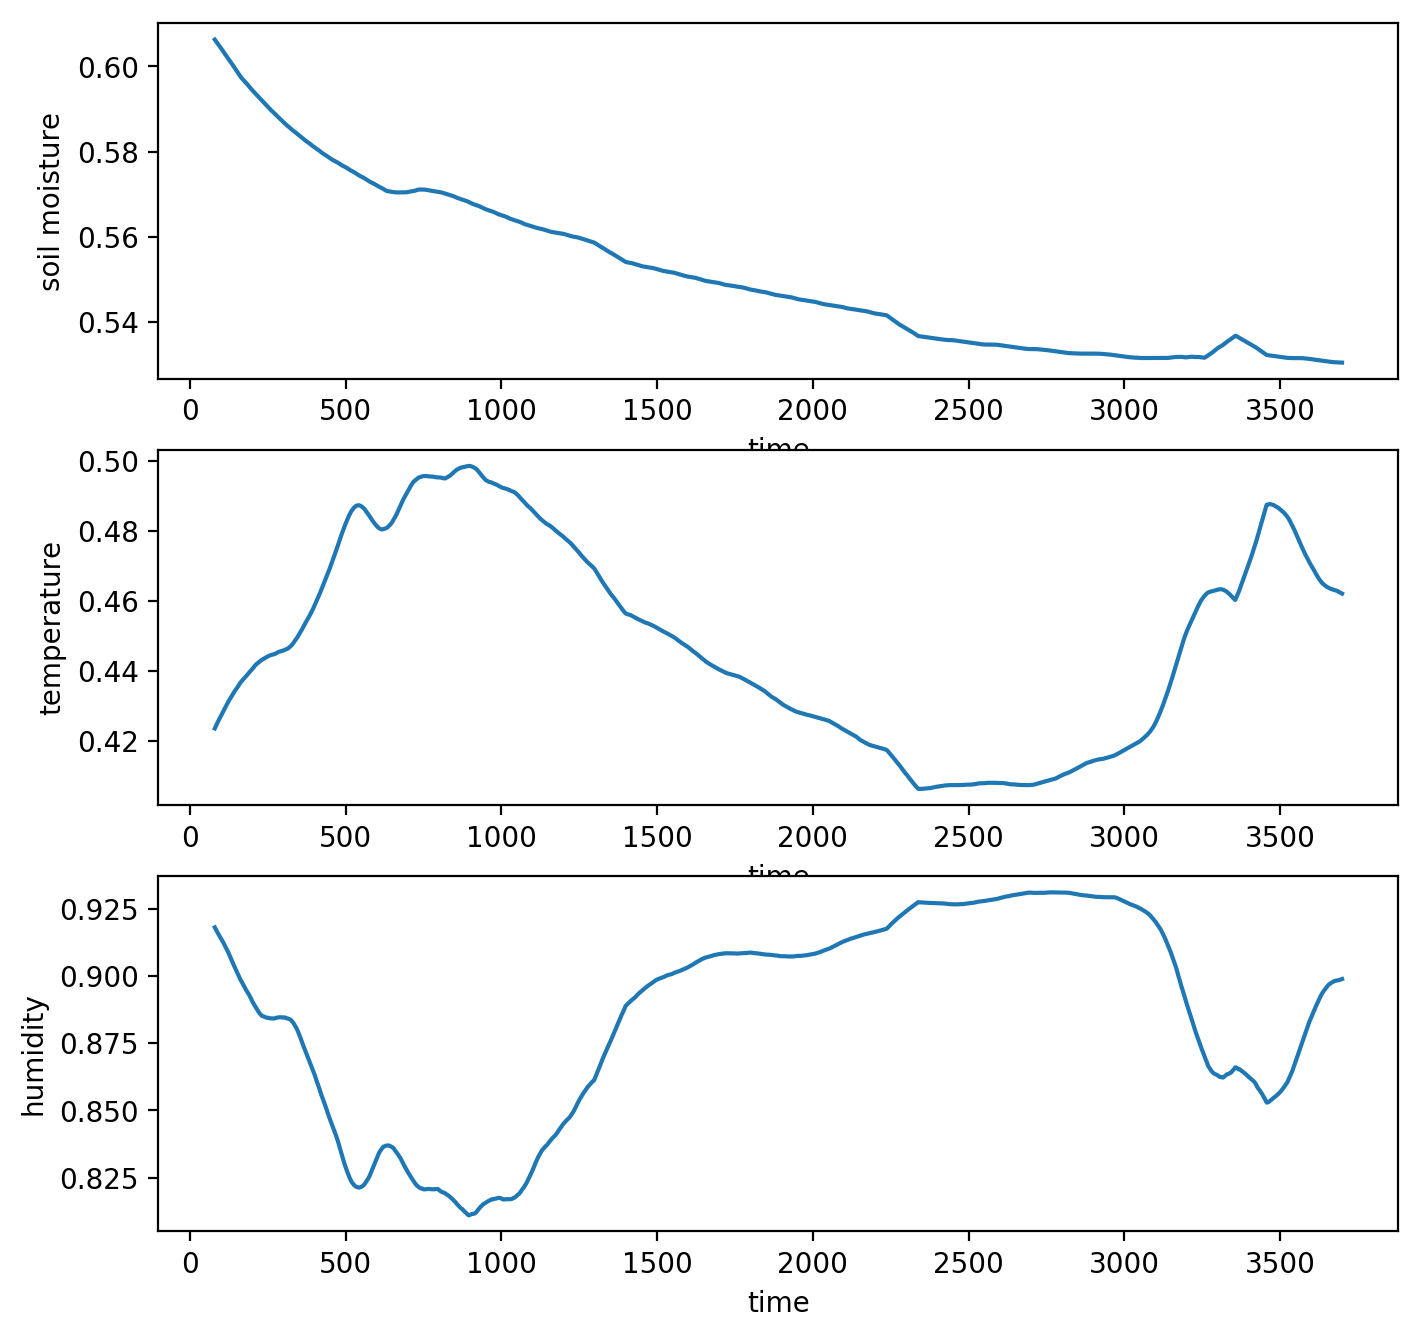

In [27]:
fig,axs = plt.subplots(3,1,figsize=(8,8), dpi=200)
# for i in range(len(data_eva)):
#     axs[i//2,i%2].plot(data_eva[i].SoilMoisture)
axs[0].plot(scale_data_use.SoilMoisture[80:3700])
axs[1].plot(scale_data_use.Temperature[80:3700])
axs[2].plot(scale_data_use.Humidity[80:3700])

axs[0].set_xlabel('time')
axs[1].set_xlabel('time')
axs[2].set_xlabel('time')

axs[0].set_ylabel('soil moisture')
axs[1].set_ylabel('temperature')
axs[2].set_ylabel('humidity')

plt.show()

### Split data

In [28]:
X_data = np.transpose([scale_data_use.SoilMoisture.to_list(),
          scale_data_use.Humidity.to_list(),
          scale_data_use.Temperature.to_list()])
y_data = scale_data_use.nextSoilMoisture.to_list()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size =  0.2, random_state = 42)

In [30]:
# def split(X_data, y_data, train_size):
#     X_train = X_data[:round(train_size*len(X_data))]
#     y_train = y_data[:round(train_size*len(y_data))]
#     X_test = X_data[round(train_size*len(X_data)):]
#     y_test = y_data[round(train_size*len(y_data)):]
#     return X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = split(X_data,y_data, train_size =  0.8)

# Training

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import LeakyReLU
def create_mlp(dim, regress=False):
    # define our MLP network
    model = Sequential()
    
    model.add(Dense(100, input_dim=dim, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100,activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dropout(0.2))
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"))
    # return our model
    return model

Using TensorFlow backend.


In [32]:
# from keras.utils.vis_utils import plot_model
# model = create_mlp(3,True)
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
model = create_mlp(3,True)
model.compile(loss="mse", optimizer='adam')
history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), epochs=3000, batch_size=int(len(X_train)))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 14848 samples, validate on 3712 samples
Epoch 1/3000
14848/14848 [==============================] - 1s 43us/step - loss: 0.3766 - val_loss: 0.3198
Epoch 2/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.3201 - val_loss: 0.2639
Epoch 3/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.2673 - val_loss: 0.2149
Epoch 4/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.2198 - val_loss: 0.1710
Epoch 5/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.1774 - val_loss: 0.1324
Epoch 6/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.1380 - val_loss: 0.0973
Epoch 7/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.1028 - val_loss: 0.0668
Epoch 8/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0729 

Epoch 61/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0129 - val_loss: 0.0034
Epoch 62/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0129 - val_loss: 0.0031
Epoch 63/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0128 - val_loss: 0.0029
Epoch 64/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0125 - val_loss: 0.0027
Epoch 65/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0123 - val_loss: 0.0025
Epoch 66/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0125 - val_loss: 0.0025
Epoch 67/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0125 - val_loss: 0.0024
Epoch 68/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0124 - val_loss: 0.0024
Epoch 69/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0125 - val_loss: 0.0025
Epoch 70/3000
14848/14848 [==========

Epoch 138/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0081 - val_loss: 0.0018
Epoch 139/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0082 - val_loss: 0.0018
Epoch 140/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0082 - val_loss: 0.0018
Epoch 141/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0082 - val_loss: 0.0018
Epoch 142/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0079 - val_loss: 0.0018
Epoch 143/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0080 - val_loss: 0.0018
Epoch 144/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0079 - val_loss: 0.0018
Epoch 145/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0080 - val_loss: 0.0017
Epoch 146/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0078 - val_loss: 0.0017
Epoch 147/3000
14848/14848 [

Epoch 213/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0055 - val_loss: 7.0967e-04
Epoch 214/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0055 - val_loss: 6.7978e-04
Epoch 215/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0055 - val_loss: 6.0800e-04
Epoch 216/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0054 - val_loss: 5.9098e-04
Epoch 217/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0056 - val_loss: 6.0954e-04
Epoch 218/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0055 - val_loss: 6.5660e-04
Epoch 219/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0054 - val_loss: 6.6031e-04
Epoch 220/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0054 - val_loss: 5.9818e-04
Epoch 221/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0053 - val_loss: 5.8

Epoch 287/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0046 - val_loss: 5.3282e-04
Epoch 288/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0046 - val_loss: 5.5678e-04
Epoch 289/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0045 - val_loss: 5.9341e-04
Epoch 290/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0047 - val_loss: 5.9439e-04
Epoch 291/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0046 - val_loss: 5.5943e-04
Epoch 292/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0046 - val_loss: 5.3752e-04
Epoch 293/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0045 - val_loss: 5.3217e-04
Epoch 294/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0046 - val_loss: 5.5082e-04
Epoch 295/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0046 - val_loss: 5.8

14848/14848 [==============================] - 0s 5us/step - loss: 0.0042 - val_loss: 5.3898e-04
Epoch 361/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0042 - val_loss: 5.6339e-04
Epoch 362/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0043 - val_loss: 5.6871e-04
Epoch 363/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0043 - val_loss: 5.4687e-04
Epoch 364/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0041 - val_loss: 5.1748e-04
Epoch 365/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0042 - val_loss: 5.1059e-04
Epoch 366/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0042 - val_loss: 5.3172e-04
Epoch 367/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0041 - val_loss: 5.7985e-04
Epoch 368/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0042 - val_loss: 5.6016e-04
Epoch 3

Epoch 434/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 5.3315e-04
Epoch 435/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0040 - val_loss: 5.4131e-04
Epoch 436/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0040 - val_loss: 5.2226e-04
Epoch 437/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 5.0235e-04
Epoch 438/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 5.0929e-04
Epoch 439/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0041 - val_loss: 5.2466e-04
Epoch 440/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 5.3033e-04
Epoch 441/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 5.1359e-04
Epoch 442/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 4.9

Epoch 508/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 4.8160e-04
Epoch 509/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 5.1866e-04
Epoch 510/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 5.2604e-04
Epoch 511/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 5.0729e-04
Epoch 512/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 4.7470e-04
Epoch 513/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 4.6581e-04
Epoch 514/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 4.7912e-04
Epoch 515/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 5.0743e-04
Epoch 516/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 5.2

Epoch 582/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0035 - val_loss: 4.7687e-04
Epoch 583/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0035 - val_loss: 4.9721e-04
Epoch 584/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 4.8250e-04
Epoch 585/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 4.5977e-04
Epoch 586/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 4.5296e-04
Epoch 587/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 4.6604e-04
Epoch 588/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0035 - val_loss: 4.8225e-04
Epoch 589/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 4.8207e-04
Epoch 590/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0035 - val_loss: 4.7

Epoch 656/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 4.5905e-04
Epoch 657/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0033 - val_loss: 4.4043e-04
Epoch 658/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 4.3761e-04
Epoch 659/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 4.4466e-04
Epoch 660/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 4.7328e-04
Epoch 661/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 4.8822e-04
Epoch 662/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 4.7608e-04
Epoch 663/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 4.5462e-04
Epoch 664/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 4.4

Epoch 730/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0032 - val_loss: 4.4257e-04
Epoch 731/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0033 - val_loss: 4.5028e-04
Epoch 732/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0033 - val_loss: 4.6002e-04
Epoch 733/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0032 - val_loss: 4.5699e-04
Epoch 734/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0032 - val_loss: 4.4964e-04
Epoch 735/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0033 - val_loss: 4.4037e-04
Epoch 736/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0033 - val_loss: 4.4332e-04
Epoch 737/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0032 - val_loss: 4.5123e-04
Epoch 738/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0032 - val_loss: 4.5

Epoch 804/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 4.3698e-04
Epoch 805/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0031 - val_loss: 4.3722e-04
Epoch 806/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 4.4357e-04
Epoch 807/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 4.4754e-04
Epoch 808/3000
14848/14848 [==============================] - 0s 10us/step - loss: 0.0031 - val_loss: 4.4682e-04
Epoch 809/3000
14848/14848 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 4.4515e-04
Epoch 810/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0031 - val_loss: 4.4025e-04
Epoch 811/3000
14848/14848 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 4.3020e-04
Epoch 812/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0031 - val_loss: 4.

14848/14848 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 4.4531e-04
Epoch 878/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0030 - val_loss: 4.3345e-04
Epoch 879/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 4.2129e-04
Epoch 880/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0030 - val_loss: 4.2187e-04
Epoch 881/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 4.2810e-04
Epoch 882/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 4.4387e-04
Epoch 883/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 4.4903e-04
Epoch 884/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0029 - val_loss: 4.3836e-04
Epoch 885/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0029 - val_loss: 4.2809e-04
Epoch 8

Epoch 951/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 4.2437e-04
Epoch 952/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 4.1400e-04
Epoch 953/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0029 - val_loss: 4.1584e-04
Epoch 954/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 4.2756e-04
Epoch 955/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 4.4305e-04
Epoch 956/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 4.5111e-04
Epoch 957/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0029 - val_loss: 4.3421e-04
Epoch 958/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0028 - val_loss: 4.1701e-04
Epoch 959/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0028 - val_loss: 4.1

Epoch 1024/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0028 - val_loss: 4.2204e-04
Epoch 1025/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 4.1749e-04
Epoch 1026/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 4.2366e-04
Epoch 1027/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0028 - val_loss: 4.2780e-04
Epoch 1028/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0028 - val_loss: 4.3698e-04
Epoch 1029/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0028 - val_loss: 4.3164e-04
Epoch 1030/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0028 - val_loss: 4.1975e-04
Epoch 1031/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0027 - val_loss: 4.1595e-04
Epoch 1032/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0028 - val_

Epoch 1097/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 4.1209e-04
Epoch 1098/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0026 - val_loss: 4.1497e-04
Epoch 1099/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 4.2060e-04
Epoch 1100/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0026 - val_loss: 4.2561e-04
Epoch 1101/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 4.2758e-04
Epoch 1102/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 4.1341e-04
Epoch 1103/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 4.1194e-04
Epoch 1104/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 4.2398e-04
Epoch 1105/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0026 - val_

Epoch 1170/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0026 - val_loss: 4.0656e-04
Epoch 1171/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0026 - val_loss: 4.0253e-04
Epoch 1172/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0025 - val_loss: 4.1479e-04
Epoch 1173/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0026 - val_loss: 4.3148e-04
Epoch 1174/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0026 - val_loss: 4.3050e-04
Epoch 1175/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0026 - val_loss: 4.1551e-04
Epoch 1176/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.1309e-04
Epoch 1177/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.1248e-04
Epoch 1178/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0026 - val_

Epoch 1243/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.2120e-04
Epoch 1244/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.1794e-04
Epoch 1245/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.1316e-04
Epoch 1246/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.1114e-04
Epoch 1247/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0024 - val_loss: 4.0764e-04
Epoch 1248/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.0871e-04
Epoch 1249/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0025 - val_loss: 4.1360e-04
Epoch 1250/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0024 - val_loss: 4.1884e-04
Epoch 1251/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0025 - val_

Epoch 1316/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0024 - val_loss: 3.9522e-04
Epoch 1317/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0024 - val_loss: 4.1397e-04
Epoch 1318/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0024 - val_loss: 4.4604e-04
Epoch 1319/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0023 - val_loss: 4.2734e-04
Epoch 1320/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0024 - val_loss: 3.9632e-04
Epoch 1321/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0024 - val_loss: 3.8987e-04
Epoch 1322/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0023 - val_loss: 4.0069e-04
Epoch 1323/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0024 - val_loss: 4.3968e-04
Epoch 1324/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0024 - val_

Epoch 1389/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0022 - val_loss: 4.0308e-04
Epoch 1390/3000
14848/14848 [==============================] - 0s 9us/step - loss: 0.0023 - val_loss: 4.1198e-04
Epoch 1391/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0023 - val_loss: 4.1264e-04
Epoch 1392/3000
14848/14848 [==============================] - 0s 9us/step - loss: 0.0023 - val_loss: 4.0791e-04
Epoch 1393/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0023 - val_loss: 4.0771e-04
Epoch 1394/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0023 - val_loss: 4.1382e-04
Epoch 1395/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0022 - val_loss: 4.0823e-04
Epoch 1396/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0023 - val_loss: 4.0386e-04
Epoch 1397/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0023 - val_

Epoch 1462/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0021 - val_loss: 4.1052e-04
Epoch 1463/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0022 - val_loss: 4.0038e-04
Epoch 1464/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0022 - val_loss: 3.9780e-04
Epoch 1465/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0022 - val_loss: 4.0047e-04
Epoch 1466/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0022 - val_loss: 4.0947e-04
Epoch 1467/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0021 - val_loss: 4.1487e-04
Epoch 1468/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0022 - val_loss: 4.0538e-04
Epoch 1469/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0022 - val_loss: 3.9708e-04
Epoch 1470/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0022 - val_

Epoch 1535/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0021 - val_loss: 3.9636e-04
Epoch 1536/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0021 - val_loss: 4.0167e-04
Epoch 1537/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0021 - val_loss: 4.1015e-04
Epoch 1538/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0021 - val_loss: 4.0862e-04
Epoch 1539/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0021 - val_loss: 4.0109e-04
Epoch 1540/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0020 - val_loss: 4.0028e-04
Epoch 1541/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0021 - val_loss: 4.0115e-04
Epoch 1542/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_loss: 4.0902e-04
Epoch 1543/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0021 - val_

Epoch 1608/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_loss: 4.2897e-04
Epoch 1609/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_loss: 3.9744e-04
Epoch 1610/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0020 - val_loss: 3.8841e-04
Epoch 1611/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0020 - val_loss: 3.9123e-04
Epoch 1612/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_loss: 4.0919e-04
Epoch 1613/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_loss: 4.1739e-04
Epoch 1614/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_loss: 4.0358e-04
Epoch 1615/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_loss: 3.9077e-04
Epoch 1616/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0020 - val_

Epoch 1681/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0019 - val_loss: 3.9458e-04
Epoch 1682/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0019 - val_loss: 3.9439e-04
Epoch 1683/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0019 - val_loss: 3.9984e-04
Epoch 1684/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0019 - val_loss: 4.0715e-04
Epoch 1685/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0019 - val_loss: 4.0523e-04
Epoch 1686/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0019 - val_loss: 3.9913e-04
Epoch 1687/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0019 - val_loss: 3.9062e-04
Epoch 1688/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0019 - val_loss: 3.9309e-04
Epoch 1689/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0019 - val_

Epoch 1754/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0018 - val_loss: 3.9503e-04
Epoch 1755/3000
14848/14848 [==============================] - 0s 7us/step - loss: 0.0018 - val_loss: 4.0004e-04
Epoch 1756/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0018 - val_loss: 4.0641e-04
Epoch 1757/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0018 - val_loss: 4.0139e-04
Epoch 1758/3000
14848/14848 [==============================] - 0s 9us/step - loss: 0.0018 - val_loss: 3.9319e-04
Epoch 1759/3000
14848/14848 [==============================] - 0s 9us/step - loss: 0.0018 - val_loss: 3.9200e-04
Epoch 1760/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0018 - val_loss: 4.0785e-04
Epoch 1761/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0019 - val_loss: 4.0418e-04
Epoch 1762/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0018 - val_

Epoch 1827/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0017 - val_loss: 4.0175e-04
Epoch 1828/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0018 - val_loss: 4.0653e-04
Epoch 1829/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0017 - val_loss: 3.9405e-04
Epoch 1830/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0017 - val_loss: 3.9043e-04
Epoch 1831/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0017 - val_loss: 3.9762e-04
Epoch 1832/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0017 - val_loss: 4.0866e-04
Epoch 1833/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0017 - val_loss: 3.9792e-04
Epoch 1834/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0017 - val_loss: 3.9065e-04
Epoch 1835/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0017 - val_

Epoch 1900/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0016 - val_loss: 3.9235e-04
Epoch 1901/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0017 - val_loss: 3.9180e-04
Epoch 1902/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0017 - val_loss: 3.9588e-04
Epoch 1903/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0017 - val_loss: 3.9127e-04
Epoch 1904/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0017 - val_loss: 3.9292e-04
Epoch 1905/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0016 - val_loss: 3.9877e-04
Epoch 1906/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0017 - val_loss: 3.9785e-04
Epoch 1907/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0017 - val_loss: 3.9628e-04
Epoch 1908/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0017 - val_

Epoch 1973/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0016 - val_loss: 3.9668e-04
Epoch 1974/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0016 - val_loss: 3.8744e-04
Epoch 1975/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0016 - val_loss: 3.8966e-04
Epoch 1976/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0016 - val_loss: 4.0240e-04
Epoch 1977/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 4.0492e-04
Epoch 1978/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0016 - val_loss: 3.9129e-04
Epoch 1979/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0016 - val_loss: 3.8452e-04
Epoch 1980/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0016 - val_loss: 3.8774e-04
Epoch 1981/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0016 - val_

Epoch 2046/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0015 - val_loss: 3.9614e-04
Epoch 2047/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0015 - val_loss: 4.1403e-04
Epoch 2048/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 3.9553e-04
Epoch 2049/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 3.8390e-04
Epoch 2050/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 3.8766e-04
Epoch 2051/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 4.0745e-04
Epoch 2052/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0015 - val_loss: 4.0970e-04
Epoch 2053/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0015 - val_loss: 3.8834e-04
Epoch 2054/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_

Epoch 2119/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 3.8592e-04
Epoch 2120/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 3.9542e-04
Epoch 2121/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 3.9735e-04
Epoch 2122/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0014 - val_loss: 3.8596e-04
Epoch 2123/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 3.8319e-04
Epoch 2124/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 3.9166e-04
Epoch 2125/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 4.1159e-04
Epoch 2126/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0015 - val_loss: 3.9370e-04
Epoch 2127/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_

Epoch 2192/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0014 - val_loss: 3.8696e-04
Epoch 2193/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0013 - val_loss: 3.8906e-04
Epoch 2194/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0013 - val_loss: 3.8831e-04
Epoch 2195/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0014 - val_loss: 3.8888e-04
Epoch 2196/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0014 - val_loss: 3.9003e-04
Epoch 2197/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 3.9397e-04
Epoch 2198/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.8789e-04
Epoch 2199/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_loss: 3.8712e-04
Epoch 2200/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0014 - val_

Epoch 2265/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.9955e-04
Epoch 2266/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.8558e-04
Epoch 2267/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.8008e-04
Epoch 2268/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.8614e-04
Epoch 2269/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.9007e-04
Epoch 2270/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.8684e-04
Epoch 2271/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.8685e-04
Epoch 2272/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_loss: 3.8439e-04
Epoch 2273/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0013 - val_

Epoch 2338/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0012 - val_loss: 3.8209e-04
Epoch 2339/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0012 - val_loss: 3.8046e-04
Epoch 2340/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0012 - val_loss: 3.8557e-04
Epoch 2341/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0013 - val_loss: 3.9128e-04
Epoch 2342/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0013 - val_loss: 3.8633e-04
Epoch 2343/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0012 - val_loss: 3.7935e-04
Epoch 2344/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0012 - val_loss: 3.8331e-04
Epoch 2345/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0012 - val_loss: 3.8676e-04
Epoch 2346/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0012 - val_

Epoch 2411/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0012 - val_loss: 3.8186e-04
Epoch 2412/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0012 - val_loss: 3.8676e-04
Epoch 2413/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0012 - val_loss: 3.8077e-04
Epoch 2414/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0012 - val_loss: 3.7957e-04
Epoch 2415/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0012 - val_loss: 3.8729e-04
Epoch 2416/3000
14848/14848 [==============================] - 0s 8us/step - loss: 0.0012 - val_loss: 3.8888e-04
Epoch 2417/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0012 - val_loss: 3.8246e-04
Epoch 2418/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0012 - val_loss: 3.7954e-04
Epoch 2419/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0012 - val_

Epoch 2484/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0011 - val_loss: 3.8354e-04
Epoch 2485/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0011 - val_loss: 3.8658e-04
Epoch 2486/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0011 - val_loss: 3.8259e-04
Epoch 2487/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0011 - val_loss: 3.7845e-04
Epoch 2488/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0011 - val_loss: 3.8305e-04
Epoch 2489/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0011 - val_loss: 3.8574e-04
Epoch 2490/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0011 - val_loss: 3.7991e-04
Epoch 2491/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0011 - val_loss: 3.7592e-04
Epoch 2492/3000
14848/14848 [==============================] - 0s 6us/step - loss: 0.0011 - val_

Epoch 2557/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0010 - val_loss: 3.7948e-04
Epoch 2558/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0011 - val_loss: 3.7847e-04
Epoch 2559/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0011 - val_loss: 3.8401e-04
Epoch 2560/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0010 - val_loss: 3.8807e-04
Epoch 2561/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0010 - val_loss: 3.7686e-04
Epoch 2562/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0010 - val_loss: 3.7243e-04
Epoch 2563/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0011 - val_loss: 3.7685e-04
Epoch 2564/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0010 - val_loss: 3.8591e-04
Epoch 2565/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0011 - val_

Epoch 2630/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0010 - val_loss: 3.7653e-04
Epoch 2631/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.8808e-04 - val_loss: 3.8295e-04
Epoch 2632/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0010 - val_loss: 3.7913e-04
Epoch 2633/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.9806e-04 - val_loss: 3.7419e-04
Epoch 2634/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0010 - val_loss: 3.7531e-04
Epoch 2635/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.9507e-04 - val_loss: 3.8136e-04
Epoch 2636/3000
14848/14848 [==============================] - 0s 4us/step - loss: 0.0010 - val_loss: 3.7524e-04
Epoch 2637/3000
14848/14848 [==============================] - 0s 5us/step - loss: 0.0010 - val_loss: 3.7357e-04
Epoch 2638/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9

Epoch 2701/3000
14848/14848 [==============================] - 0s 5us/step - loss: 9.7454e-04 - val_loss: 3.7323e-04
Epoch 2702/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.5588e-04 - val_loss: 3.7852e-04
Epoch 2703/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.7142e-04 - val_loss: 3.7491e-04
Epoch 2704/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.5031e-04 - val_loss: 3.7201e-04
Epoch 2705/3000
14848/14848 [==============================] - 0s 6us/step - loss: 9.5147e-04 - val_loss: 3.7574e-04
Epoch 2706/3000
14848/14848 [==============================] - 0s 7us/step - loss: 9.7730e-04 - val_loss: 3.8295e-04
Epoch 2707/3000
14848/14848 [==============================] - 0s 6us/step - loss: 9.6824e-04 - val_loss: 3.7481e-04
Epoch 2708/3000
14848/14848 [==============================] - 0s 6us/step - loss: 9.4767e-04 - val_loss: 3.7306e-04
Epoch 2709/3000
14848/14848 [==============================] - 0

14848/14848 [==============================] - 0s 4us/step - loss: 9.2231e-04 - val_loss: 3.7484e-04
Epoch 2772/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.1519e-04 - val_loss: 3.7370e-04
Epoch 2773/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.2065e-04 - val_loss: 3.7693e-04
Epoch 2774/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.0704e-04 - val_loss: 3.8367e-04
Epoch 2775/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.4552e-04 - val_loss: 3.7777e-04
Epoch 2776/3000
14848/14848 [==============================] - 0s 5us/step - loss: 9.1574e-04 - val_loss: 3.7184e-04
Epoch 2777/3000
14848/14848 [==============================] - 0s 4us/step - loss: 9.2266e-04 - val_loss: 3.7165e-04
Epoch 2778/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.8358e-04 - val_loss: 3.7632e-04
Epoch 2779/3000
14848/14848 [==============================] - 0s 4us/step - los

Epoch 2842/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.7336e-04 - val_loss: 3.7776e-04
Epoch 2843/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.5365e-04 - val_loss: 3.7171e-04
Epoch 2844/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.6471e-04 - val_loss: 3.7053e-04
Epoch 2845/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.7664e-04 - val_loss: 3.7282e-04
Epoch 2846/3000
14848/14848 [==============================] - 0s 5us/step - loss: 8.9528e-04 - val_loss: 3.7857e-04
Epoch 2847/3000
14848/14848 [==============================] - 0s 5us/step - loss: 8.8249e-04 - val_loss: 3.7116e-04
Epoch 2848/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.5892e-04 - val_loss: 3.6927e-04
Epoch 2849/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.8897e-04 - val_loss: 3.7449e-04
Epoch 2850/3000
14848/14848 [==============================] - 0

14848/14848 [==============================] - 0s 5us/step - loss: 8.4166e-04 - val_loss: 3.6988e-04
Epoch 2913/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.6536e-04 - val_loss: 3.7032e-04
Epoch 2914/3000
14848/14848 [==============================] - 0s 5us/step - loss: 8.4449e-04 - val_loss: 3.7231e-04
Epoch 2915/3000
14848/14848 [==============================] - 0s 5us/step - loss: 8.4462e-04 - val_loss: 3.7323e-04
Epoch 2916/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.3987e-04 - val_loss: 3.7278e-04
Epoch 2917/3000
14848/14848 [==============================] - 0s 5us/step - loss: 8.4127e-04 - val_loss: 3.7335e-04
Epoch 2918/3000
14848/14848 [==============================] - 0s 5us/step - loss: 8.2902e-04 - val_loss: 3.7026e-04
Epoch 2919/3000
14848/14848 [==============================] - 0s 5us/step - loss: 8.3181e-04 - val_loss: 3.6824e-04
Epoch 2920/3000
14848/14848 [==============================] - 0s 5us/step - los

Epoch 2983/3000
14848/14848 [==============================] - 0s 4us/step - loss: 7.9459e-04 - val_loss: 3.6878e-04
Epoch 2984/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.0213e-04 - val_loss: 3.6766e-04
Epoch 2985/3000
14848/14848 [==============================] - 0s 4us/step - loss: 7.9620e-04 - val_loss: 3.6982e-04
Epoch 2986/3000
14848/14848 [==============================] - 0s 4us/step - loss: 7.9332e-04 - val_loss: 3.7560e-04
Epoch 2987/3000
14848/14848 [==============================] - 0s 4us/step - loss: 7.8020e-04 - val_loss: 3.7266e-04
Epoch 2988/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.0068e-04 - val_loss: 3.7039e-04
Epoch 2989/3000
14848/14848 [==============================] - 0s 4us/step - loss: 8.0343e-04 - val_loss: 3.7249e-04
Epoch 2990/3000
14848/14848 [==============================] - 0s 4us/step - loss: 7.9369e-04 - val_loss: 3.7683e-04
Epoch 2991/3000
14848/14848 [==============================] - 0

In [34]:
# history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), epochs=2000, batch_size=int(len(X_train)))

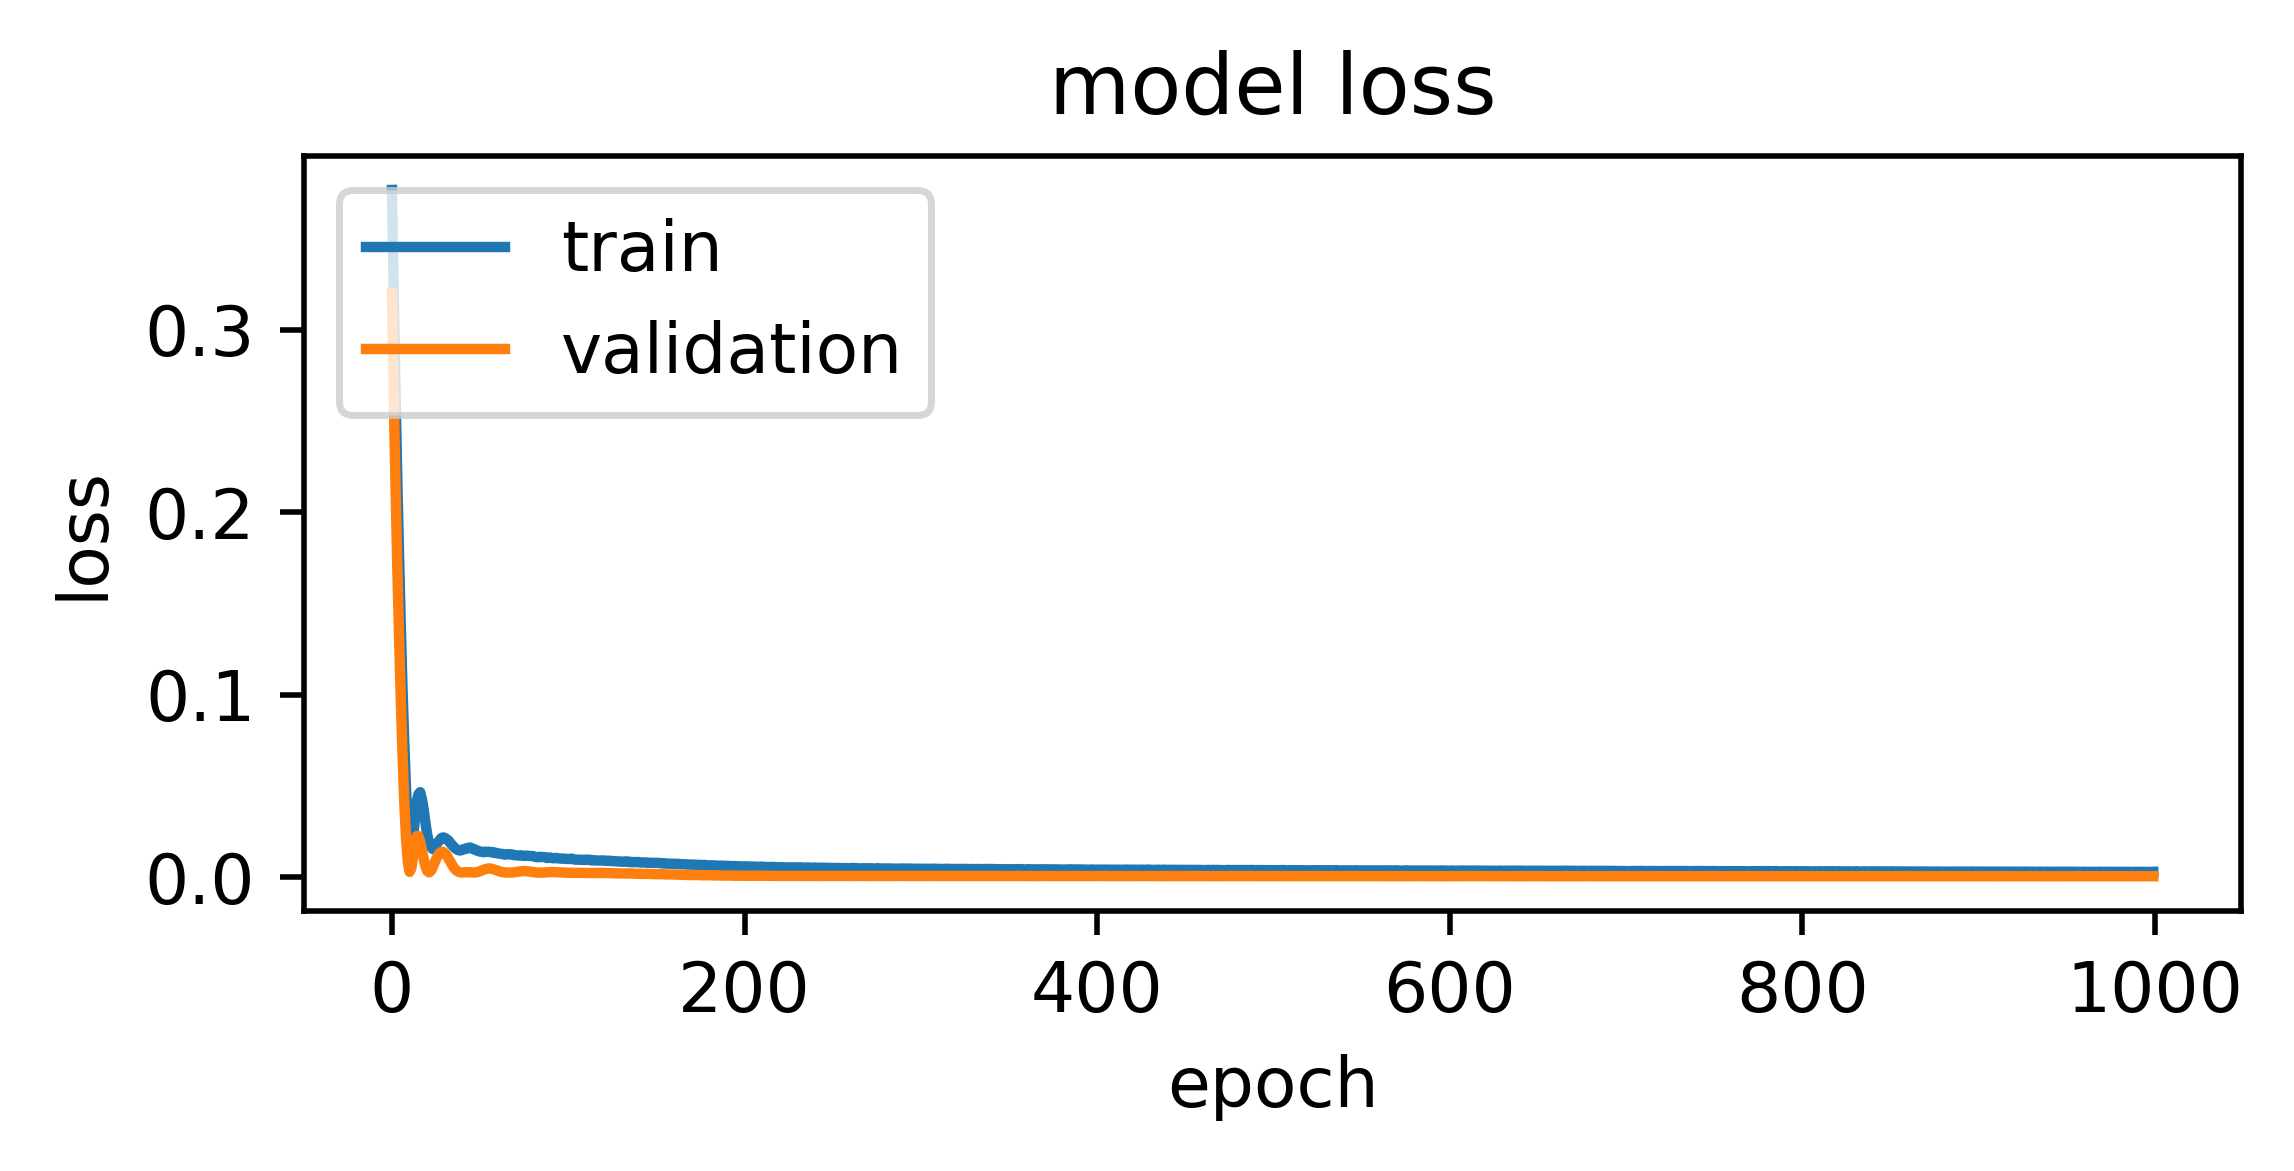

In [35]:
figure(num=None, figsize=(5, 2), dpi=500, facecolor='w', edgecolor='k')
plt.plot(history.history['loss'][0:1000])
plt.plot(history.history['val_loss'][0:1000])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
plt.savefig('model_loss.svg')

In [36]:
X_test

array([[0.71393833, 0.83940594, 0.51631188],
       [0.68201214, 0.89967327, 0.47537129],
       [0.62750818, 0.86492079, 0.52784653],
       ...,
       [0.63275616, 0.89834653, 0.47606436],
       [0.64069367, 0.89581188, 0.47470297],
       [0.71553767, 0.80922772, 0.54544554]])

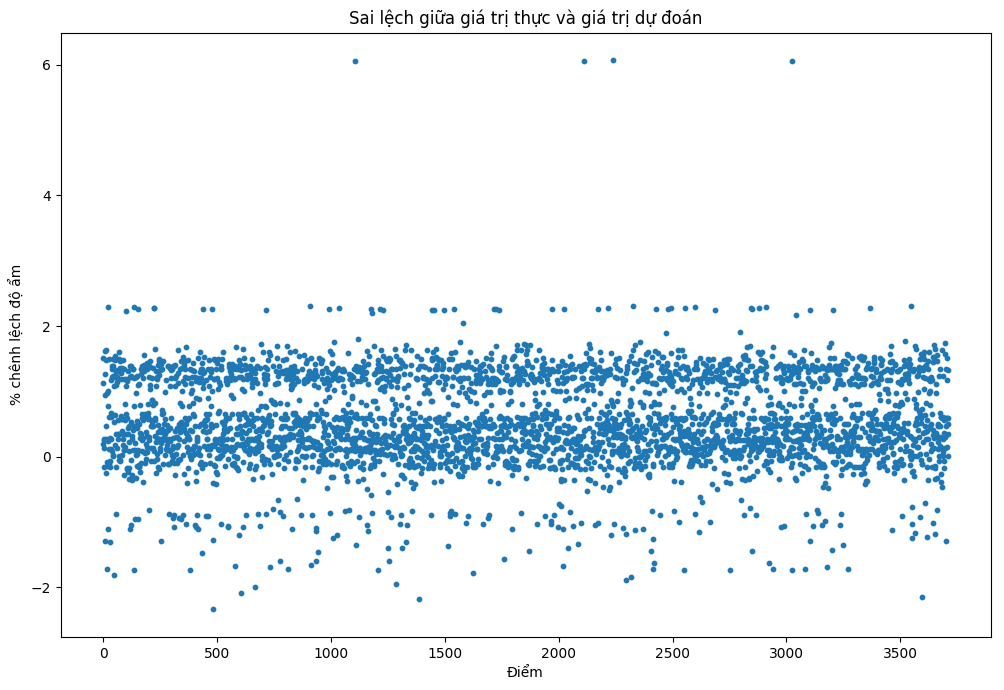

In [37]:
result=(model.predict(np.array(X_test)))
start = 0
figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
# plt.plot(y_test[start:st?art+200],'-',)
# plt.plot(result[start:start+200],'r-')
#####
diff = [np.transpose(X_test)[0][i]*100-result[i]*100 for i in range(len(y_test))]
plt.title("Sai lệch giữa giá trị thực và giá trị dự đoán")
plt.xlabel("Điểm")
plt.ylabel("% chênh lệch độ ẩm")
plt.scatter(list(range(len(diff))),diff,s=10)

#####
# real = plt.scatter(list(range(len(result)))[start:start+2900],y_test[start:start+2900],c='r',s=10)
# predict = plt.scatter(list(range(len(result)))[start:start+2900],result[start:start+2900],c='b',s=10)
# plt.title('Giá trị độ ẩm đất dự đoán và độ ẩm đất thực tế')
# plt.xlabel('Mẫu')
# plt.ylabel('Giá trị % độ ẩm đất')
# plt.legend((real,predict),('giá trị thực','giá trị dự đoán'))
#####
# plt.scatter(list(range(len(np.transpose(X_test)[0])))[start:start+2900],np.transpose(X_test)[0][start:start+2900],c='b',s=5)
# plt.hist(diff[start:start+2900])
# plt.show()

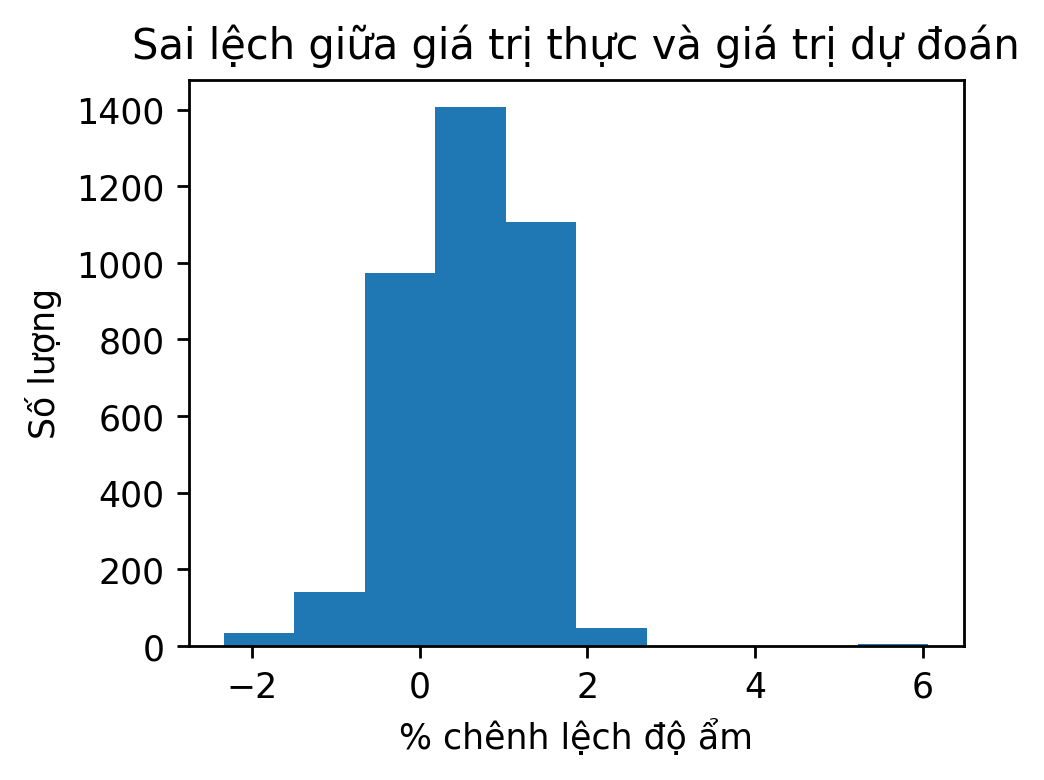

In [49]:
figure(num=None, figsize=(4, 3), dpi=250, facecolor='w', edgecolor='k')
plt.title("Sai lệch giữa giá trị thực và giá trị dự đoán")
plt.ylabel("Số lượng")
plt.xlabel("% chênh lệch độ ẩm")
plt.hist(np.array(diff).transpose()[0])
plt.savefig('diff.svg')

In [39]:
model.save('eva_hourly_v2.h5')

In [40]:
hu=70
soi=80
tem=31
soi = scaleData(min_soilmoisture,max_soilmoisture,0,1,soi)
hu = scaleData(min_humidity,max_humidity,0,1,hu)
temp = scaleData(min_temperature,max_temperature,0,1,tem)
model.predict(np.array([soi,hu,temp]).reshape(1,-1))

array([[0.7696341]], dtype=float32)

In [41]:
def nextSM(model,sc_soi,sc_hu,sc_tem,i,a):
    if(i>=60):
        return sc_soi,a
    else:
        a.append(sc_soi)
        sc_d_soi=model.predict(np.array([sc_soi,sc_hu,sc_tem]).reshape(1,-1))
        
        soi = scaleData(0,1,min_soilmoisture,max_soilmoisture,sc_soi)
        d_soi = scaleData(0,1,min_dSoilmoisture,max_dSoilmoisture,sc_d_soi)
        soi -= d_soi
        sc_soi = scaleData(min_soilmoisture,max_soilmoisture,0,1,soi)
        nextSM(model,sc_soi,sc_hu,sc_tem,i+1,a)
hu=56
soi=80
tem=34
soi = scaleData(min_soilmoisture,max_soilmoisture,0,1,soi)
hu = scaleData(min_humidity,max_humidity,0,1,hu)
temp = scaleData(min_temperature,max_temperature,0,1,tem)
a = []

ret = nextSM(model,soi,hu,tem,0,a)

plt.plot(a)

NameError: name 'min_dSoilmoisture' is not defined

In [ ]:

(result.reshape(1,-1)[0])
# result.max()